# Yellow Mobile
## Data Churn Prediction
### Author: Shaylen Hira
### Date: August 5, 2022

<a href='#1'>1. Introduction<br></a>
<a href='#2'><br>2. Exploratory Data Analysis<br></a>
<a href='#3'><br>3. Feature Selection<br></a>
<a href='#4'><br>4. Model Creation<br></a>
<a href='#5'><br>5. Model Evaluation<br></a>
<a href='#6'><br>6. Model Selection<br></a>
<a href='#7'><br>7. Conclusion<br></a>
<a href='#8'><br>8. Recommendations</a>

### <a id='1'>1. Introduction</a>

Data consumption is the life blood in the telecoms industry. There exists scenarios where subscribers reduce and stop using data, this is referred to as data churn. A sample dataset of subscribers from Yellow mobile is provided containing data related to each subscriber's data and voice bundle usage over a 5 week period.

An analysis is conducted to to identify key insights from the dataset that can help Yellow mobile better understand their subscriber's data usage patterns. A series of prediction models are developed and evaluated to determine what the most efficient and accurate model selection is for predicting whether a subscriber will churn in the following week (not use data).

The predictions are ultimately used to identify targetted campaigns that can be conducted to reduce the data churn rate at Yellow Mobile.

### <a id='2'>2. Exploratory Data Analysis</a>

In [1]:
import pandas as pd
import numpy as np
from math import ceil
import itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')

py.init_notebook_mode(connected=True)
pd.options.display.max_columns = None

In [2]:
df = pd.read_csv('data/data.csv')

In [3]:
print("Rows:", df.shape[0])
print("Number of features:", df.shape[1])
print("Missing values:", df.isnull().sum().values.sum())
df.head()

Rows: 60638
Number of features: 217
Missing values: 0


,row_id,DOLA_01,DATA_DOLA_01,DAT_ACT_DAYS_01,TOT_ACT_DAYS_01,DATA_SESSIONS_01,PAID_SESSIONS_01,FREE_SESSIONS_01,VOL_KB_01,FREE_VOL_KB_01,PAID_VOL_KB_01,CNT_BUNDLES_01,BUNDLE_REV_01,MAX_BUNDLE_01,MIN_BUNDLE_01,DATA_DNDL_REV_01,DATA_DNDL_CNT_01,MAX_DATA_DNDL_01,MIN_DATA_DNDL_01,MST_BGHT_BNDL_KB_01,UNQ_BTS_01,TOTAL_REV_01,TOT_VOICE_REV_01,TOT_DATA_REV_01,TOT_SMS_REV_01,INC_INT_REV_01,OUT_INTL_REV_01,INC_OFFNET_REV_01,OUT_OFFNET_REV_01,ROAM_REV_01,RECH_CNT_01,RECH_VAL_01,INC_OFFNET_MOU_01,INC_INT_MOU_01,OUT_OFFNET_MOU_01,OUT_INTL_MOU_01,OUT_ONNET_MOU_01,INC_OFFNET_CNT_01,INC_INT_CNT_01,OUT_INTL_CNT_01,OUT_OFFNET_CNT_01,OUT_ONNET_CNT_01,VOI_ACT_DAYS_01,SMS_ACT_DAYS_01,DOLA_02,DATA_DOLA_02,DAT_ACT_DAYS_02,TOT_ACT_DAYS_02,DATA_SESSIONS_02,PAID_SESSIONS_02,FREE_SESSIONS_02,VOL_KB_02,FREE_VOL_KB_02,PAID_VOL_KB_02,CNT_BUNDLES_02,BUNDLE_REV_02,MAX_BUNDLE_02,MIN_BUNDLE_02,DATA_DNDL_REV_02,DATA_DNDL_CNT_02,MAX_DATA_DNDL_02,MIN_DATA_DNDL_02,MST_BGHT_BNDL_KB_02,UNQ_BTS_02,TOTAL_REV_02,TOT_VOICE_REV_02,TOT_DATA_REV_02,TOT_SMS_REV_02,INC_INT_REV_02,OUT_INTL_REV_02,INC_OFFNET_REV_02,OUT_OFFNET_REV_02,ROAM_REV_02,RECH_CNT_02,RECH_VAL_02,INC_OFFNET_MOU_02,INC_INT_MOU_02,OUT_OFFNET_MOU_02,OUT_INTL_MOU_02,OUT_ONNET_MOU_02,INC_OFFNET_CNT_02,INC_INT_CNT_02,OUT_INTL_CNT_02,OUT_OFFNET_CNT_02,OUT_ONNET_CNT_02,VOI_ACT_DAYS_02,SMS_ACT_DAYS_02,DOLA_03,DATA_DOLA_03,DAT_ACT_DAYS_03,TOT_ACT_DAYS_03,DATA_SESSIONS_03,PAID_SESSIONS_03,FREE_SESSIONS_03,VOL_KB_03,FREE_VOL_KB_03,PAID_VOL_KB_03,CNT_BUNDLES_03,BUNDLE_REV_03,MAX_BUNDLE_03,MIN_BUNDLE_03,DATA_DNDL_REV_03,DATA_DNDL_CNT_03,MAX_DATA_DNDL_03,MIN_DATA_DNDL_03,MST_BGHT_BNDL_KB_03,UNQ_BTS_03,TOTAL_REV_03,TOT_VOICE_REV_03,TOT_DATA_REV_03,TOT_SMS_REV_03,INC_INT_REV_03,OUT_INTL_REV_03,INC_OFFNET_REV_03,OUT_OFFNET_REV_03,ROAM_REV_03,RECH_CNT_03,RECH_VAL_03,INC_OFFNET_MOU_03,INC_INT_MOU_03,OUT_OFFNET_MOU_03,OUT_INTL_MOU_03,OUT_ONNET_MOU_03,INC_OFFNET_CNT_03,INC_INT_CNT_03,OUT_INTL_CNT_03,OUT_OFFNET_CNT_03,OUT_ONNET_CNT_03,VOI_ACT_DAYS_03,SMS_ACT_DAYS_03,DOLA_04,DATA_DOLA_04,DAT_ACT_DAYS_04,TOT_ACT_DAYS_04,DATA_SESSIONS_04,PAID_SESSIONS_04,FREE_SESSIONS_04,VOL_KB_04,FREE_VOL_KB_04,PAID_VOL_KB_04,CNT_BUNDLES_04,BUNDLE_REV_04,MAX_BUNDLE_04,MIN_BUNDLE_04,DATA_DNDL_REV_04,DATA_DNDL_CNT_04,MAX_DATA_DNDL_04,MIN_DATA_DNDL_04,MST_BGHT_BNDL_KB_04,UNQ_BTS_04,TOTAL_REV_04,TOT_VOICE_REV_04,TOT_DATA_REV_04,TOT_SMS_REV_04,INC_INT_REV_04,OUT_INTL_REV_04,INC_OFFNET_REV_04,OUT_OFFNET_REV_04,ROAM_REV_04,RECH_CNT_04,RECH_VAL_04,INC_OFFNET_MOU_04,INC_INT_MOU_04,OUT_OFFNET_MOU_04,OUT_INTL_MOU_04,OUT_ONNET_MOU_04,INC_OFFNET_CNT_04,INC_INT_CNT_04,OUT_INTL_CNT_04,OUT_OFFNET_CNT_04,OUT_ONNET_CNT_04,VOI_ACT_DAYS_04,SMS_ACT_DAYS_04,DOLA_05,DATA_DOLA_05,DAT_ACT_DAYS_05,TOT_ACT_DAYS_05,DATA_SESSIONS_05,PAID_SESSIONS_05,FREE_SESSIONS_05,VOL_KB_05,FREE_VOL_KB_05,PAID_VOL_KB_05,CNT_BUNDLES_05,BUNDLE_REV_05,MAX_BUNDLE_05,MIN_BUNDLE_05,DATA_DNDL_REV_05,DATA_DNDL_CNT_05,MAX_DATA_DNDL_05,MIN_DATA_DNDL_05,MST_BGHT_BNDL_KB_05,UNQ_BTS_05,TOTAL_REV_05,TOT_VOICE_REV_05,TOT_DATA_REV_05,TOT_SMS_REV_05,INC_INT_REV_05,OUT_INTL_REV_05,INC_OFFNET_REV_05,OUT_OFFNET_REV_05,ROAM_REV_05,RECH_CNT_05,RECH_VAL_05,INC_OFFNET_MOU_05,INC_INT_MOU_05,OUT_OFFNET_MOU_05,OUT_INTL_MOU_05,OUT_ONNET_MOU_05,INC_OFFNET_CNT_05,INC_INT_CNT_05,OUT_INTL_CNT_05,OUT_OFFNET_CNT_05,OUT_ONNET_CNT_05,VOI_ACT_DAYS_05,SMS_ACT_DAYS_05,Target
0,38,0,0,7,7,1128,1128,0,568706048,0,568706048,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,101,0.000000,0.0,0.00000,0.0,0.13867,0.00,0.13867,0.000,0.0,0,0.0,3.46667,0.057778,4.166667,0.0,131.050000,3,3,0,2,20,7,1,0,0,7,7,882,759,123,4.490854e+08,6693437,442392003.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,53,0.000000,0.0,0.0,0.0,0.00000,0.00,0.00000,0.000000,0.0,0,0.00,0.00000,0.000000,0.000000,0.0,182.866667,0,0,1,0,20,7,1,0,0,7,7,602,436,166,183398400,150590464,32807936,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,42,0.000,0.0,0.0,0.0,0.00000,2.50,0.00000,0.000000,0.0,1,2.7,0.00000,0.000000,1.700000,0.0,60.583333,0,0,6,2,19,7,5,0,0,7,7,996,896,100,222566400,41120263,181446137,1,1.98,1.98,1.98,1

The dataset is clean, well structured and contains no missing values. There are 217 columns (43 features for each week). The `row_id` column is a unique identifier for a subscriber and the `Target` column represents the actual outcome of whether a subscriber churned or not. 

The following table represents a data dictionary, explaining what each feature in the dataset represents:

| Variable | Description |
| - | - |
| row_id | Unique ID |
| DOLA_XX | Last date that subscriber had a data event |
| DATA_DOLA_XX | Overall current Dola Status |
| DAT_ACT_DAYS_XX | Number of active data days |
| TOT_ACT_DAYS_XX | Total days active in the week XX |
| DATA_SESSIONS_XX | Total number of data sessions in the week XX |
| PAID_SESSIONS_XX | Total number of paid data sessions in the week XX |
| FREE_SESSIONS_XX | Total number of free data sessions in the week XX |
| VOL_KB_XX	| Sum of Kilobytes of data consumed in week XX |
| FREE_VOL_KB_XX | Sum of free Kilobytes of data consumed in week XX |
| PAID_VOL_KB_XX | Sum of paid Kilobytes of data consumed in week XX |
| CNT_BUNDLES_XX |Count of all bundles purchased, voice, data etc. in week XX |
| BUNDLE_REV_XX	| Sum of all revenue for all bundle sales in week XX |
| MAX_BUNDLE_XX	| price of most Expensive Bundle purchased in week XX |
| MIN_BUNDLE_XX	| price of cheapest bundle purchased in week XX |
| DATA_DNDL_REV_XX | Sum of all revenue for data bundle sales in week XX |
| DATA_DNDL_CNT_XX | Count of data bundles purchased in week XX |
| MAX_DATA_DNDL_XX | price of most Expensive data Bundle purchased in week XX |
| MIN_DATA_DNDL_XX | price of cheapest data bundle purchased in week XX |
| MST_BGHT_BNDL_KB_XX | volume in kilobytes of the most bought data bundle |
| UNQ_BTS_XX | Number of unique BTSs used by subscribers week XX |
| TOTAL_REV_XX | Total revenue for week XX |
| TOT_VOICE_REV_XX | voice revenue in week XX |
| TOT_DATA_REV_XX | Total data revenue in week XX |
| TOT_SMS_REV_XX | Total sms revenue in week XX |
| INC_INT_REV_XX | Total international incoming revenue in week XX |
| OUT_INTL_REV_XX | Total international outgoing revenue in week XX |
| INC_OFFNET_REV_XX | Total off-net incoming revenue in week XX |
| OUT_OFFNET_REV_XX	| Total off-net outgoing revenue in week XX |
| ROAM_REV_XX | Total international roaming revenue in week XX |
| RECH_CNT_XX | Total count of recharges in week XX |
| RECH_VAL_XX | Sum of total value of recharges in week XX |
| INC_OFFNET_MOU_XX | Total minutes of incoming offnet week XX |
| INC_INT_MOU_XX | Total minutes of incoming international week XX |
| OUT_OFFNET_MOU_XX | Total minutes of outgoing offnet week XX |
| OUT_INTL_MOU_XX | Total minutes of outgoing international week XX |
| OUT_ONNET_MOU_XX | Count of onnet incomming calls in week XX |
| INC_OFFNET_CNT_XX | Count of offnet incomming calls in week XX |
| INC_INT_CNT_XX | Count of international incomming calls in week XX |
| OUT_INTL_CNT_XX | Count of international outgoing calls in week XX |
| OUT_OFFNET_CNT_XX | Count of offnet outgoing calls in week XX |
| OUT_ONNET_CNT_XX | Count of onnet outgoing calls in week XX |
| VOI_ACT_DAYS_XX | Number of Days subscriber is voice active in the week XX |
| SMS_ACT_DAYS_XX | Number of Days subscriber is sms active in the week XX |
| Target | The target variable, which determines if a subsriber churned in the following week or not |

The columns associated with each period are extracted, where a column with a suffix of "05" refers to the most recent week and the columns with a suffix of "01" represent the earliest week in the input window.

Each week's set of columns are extracted and the `row_id` column is dropped.

In [4]:
def create_weekly_df_raw(df, week):
    
    week = '0' + str(week)
    week_cols = [col for col in df.columns if week in col]
    df_week = df[week_cols + ['Target']]

    return df_week

df_01_raw = create_weekly_df_raw(df, 1)
print("Rows:", df_01_raw.shape[0])
print("Number of features:", df_01_raw.shape[1])
df_01_raw.head()

Rows: 60638
Number of features: 44


,DOLA_01,DATA_DOLA_01,DAT_ACT_DAYS_01,TOT_ACT_DAYS_01,DATA_SESSIONS_01,PAID_SESSIONS_01,FREE_SESSIONS_01,VOL_KB_01,FREE_VOL_KB_01,PAID_VOL_KB_01,CNT_BUNDLES_01,BUNDLE_REV_01,MAX_BUNDLE_01,MIN_BUNDLE_01,DATA_DNDL_REV_01,DATA_DNDL_CNT_01,MAX_DATA_DNDL_01,MIN_DATA_DNDL_01,MST_BGHT_BNDL_KB_01,UNQ_BTS_01,TOTAL_REV_01,TOT_VOICE_REV_01,TOT_DATA_REV_01,TOT_SMS_REV_01,INC_INT_REV_01,OUT_INTL_REV_01,INC_OFFNET_REV_01,OUT_OFFNET_REV_01,ROAM_REV_01,RECH_CNT_01,RECH_VAL_01,INC_OFFNET_MOU_01,INC_INT_MOU_01,OUT_OFFNET_MOU_01,OUT_INTL_MOU_01,OUT_ONNET_MOU_01,INC_OFFNET_CNT_01,INC_INT_CNT_01,OUT_INTL_CNT_01,OUT_OFFNET_CNT_01,OUT_ONNET_CNT_01,VOI_ACT_DAYS_01,SMS_ACT_DAYS_01,Target
0,0,0,7,7,1128,1128,0,568706048,0,568706048,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,101,0.000000,0.0,0.00000,0.0,0.13867,0.00,0.13867,0.000,0.0,0,0.0,3.46667,0.057778,4.166667,0.0,131.050000,3,3,0,2,20,7,1,0
1,0,0,6,7,322,322,0,428771328,0,428771328,1,12.5,12.5,12.5,0.0,0,0.0,0.0,0,6,10.600000,10.0,0.00000,0.0,0.12667,0.60,0.12667,0.000,0.0,2,12.0,3.16667,0.052778,0.483333,0.0,34.600000,2,2,8,1,11,5,7,0
2,0,0,4,7,30,30,0,3091456,0,3091456,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,26,0.000000,0.0,0.00000,0.0,0.20866,0.12,0.20866,0.000,0.0,6,7.8,5.21666,0.086944,0.000000,0.0,145.250000,5,5,2,0,45,7,3,0
3,0,0,6,7,134,95,39,60445696,26214604,34231092,2,0.9,0.5,0.4,0.9,2,0.5,0.4,27651867,12,1.870000,0.0,1.50000,0.0,0.55666,0.37,0.55666,0.000,0.0,4,3.1,13.91666,0.231944,0.000000,0.0,6.083333,2,2,3,0,7,3,4,0
4,0,1,5,7,313,313,0,691905536,0,691905536,2,6.0,3.0,3.0,6.0,2,3.0,3.0,678586368,43,11.834026,0.0,6.71386,0.0,0.65400,0.00,0.12133,1.001,0.0,5,24.0,3.03333,0.272500,7.266667,0.0,917.583333,2,5,1,1,94,7,5,0


In [5]:
trace = go.Pie(
    labels = df["Target"].value_counts().keys().tolist(),
    values = df["Target"].value_counts().values.tolist(),
    marker = dict(
        colors = ['gold','lightgrey'],
        line = dict(color = "grey", width =  1)
    ),
    #rotation = 90,
    hoverinfo = "label + value + text",
    #hole = 0.5
)
layout = go.Layout(
    dict(
        title = "Customer Churn Ratio",
        title_x = 0.5
    ),
    width = 500,
    height = 500
)
data = [trace]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

There is a relatively good split between churned and non-churned subscribers, with 38.4% of all subscribers in the dataset churning in week 6.

### <a id='3'>3. Feature Selection</a>

Given that the dataset comprises of only numerical values, a correlation matrix is generated to understand how much each feature correlates with each other. A scatter plot matrix is generated with both colour and size encodings to enable a more efficient and effective visualization.

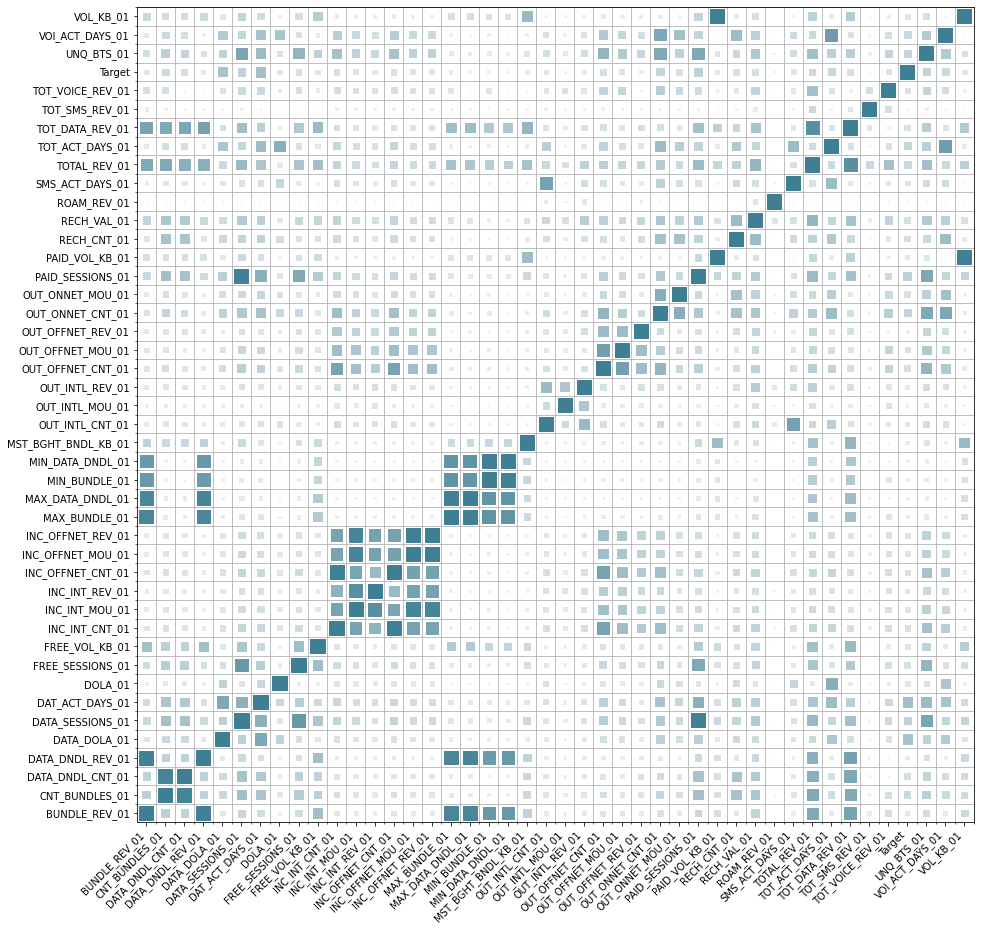

In [6]:
def generate_correlation_matrix(df, fig_size = 15, size_scale = 1000):
    
    n_colors = 200 # Use 200 colors for the diverging color palette
    palette = sns.diverging_palette(20, 220, n = n_colors) # Create the palette
    color_min, color_max = [-1, 1] # Range of values that will be mapped to the palette, i.e. min and max possible correlation

    def value_to_color(val):
        val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
        ind = int(val_position * (n_colors - 1)) # target index in the color palette
        return palette[ind]

    def heatmap(x, y, size):

        fig, ax = plt.subplots(figsize=(fig_size, fig_size))
        
        # Mapping from column names to integer coordinates
        x_labels = [v for v in sorted(x.unique())]
        y_labels = [v for v in sorted(y.unique())]
        x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
        y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 

        ax.scatter(
            x = x.map(x_to_num), # Use mapping for x
            y = y.map(y_to_num), # Use mapping for y
            s = size * size_scale, # Vector of square sizes, proportional to size parameter
            c = size.apply(value_to_color), # Vector of square color values, mapped to color palette
            marker = 's' # Use square as scatterplot marker
        )
        
        # Show column labels on the axes
        ax.set_xticks([x_to_num[v] for v in x_labels])
        ax.set_xticklabels(x_labels, rotation = 45, horizontalalignment = 'right')
        ax.set_yticks([y_to_num[v] for v in y_labels])
        ax.set_yticklabels(y_labels)

        ax.grid(False, 'major')
        ax.grid(True, 'minor')
        ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
        ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)
        ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5]) 
        ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])


    correlation = df.corr()
    correlation = pd.melt(correlation.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
    correlation.columns = ['x', 'y', 'value']

    heatmap(
        x = correlation['x'],
        y = correlation['y'],
        size = correlation['value'].abs()
    )

generate_correlation_matrix(df_01_raw, fig_size = 15, size_scale = 200)

The correlation matrix highlights that all features are either positively correlated or not correlated at all. There are some columns that are highly correlated with each other such as `DATA_DNDL_REV_XX` and `BUNDLE_REV_XX`. At least one of the columns in these pairs must be removed from this analysis to avoid multicollinearity, which states that the higher the correlation between two independent variables, the more difficult it is to change one variable without changing another. It becomes difficult for a model to estimate the relationship between each independent variable and the dependent variable independently because the independent variables tend to change in unison.

Upon inspection it is easy to identify which variables are dependent on each other. In addition to selecting only one feature from a pair that is highly correlated, at least one variable is selected from a group of features that are dependent on each other. A rule is maintained to ensure that all selected features are independent.

The selected features for the model are summarized below with a new name for each selected feature for better readability.

| Variable | New Variable Name | Description |
| - | - | - |
| DOLA_XX | LAST_DATE_EVENT_XX | Last date that subscriber had a data event |
| DAT_ACT_DAYS_XX | DATA_ACTIVE_DAYS_XX | Number of active data days |
| TOT_ACT_DAYS_XX | TOTAL_ACTIVE_DAYS_XX | Total days active in the week XX |
| DATA_SESSIONS_XX | DATA_SESSIONS_XX | Total number of data sessions in the week XX |
| VOL_KB_XX	| TOTAL_DATA_USAGE_XX | Sum of Kilobytes of data consumed in week XX |
| DATA_DNDL_CNT_XX | DATA_BUNDLES_PURCHASED_XX | Count of data bundles purchased in week XX |
| MAX_DATA_DNDL_XX | MAX_PRICE_DATA_BUNDLE_XX | Price of most Expensive data Bundle purchased in week XX |
| MST_BGHT_BNDL_KB_XX | MOST_PURCHASED_DATA_BUNDLE_SIZE_XX | Volume in kilobytes of the most bought data bundle |
| UNQ_BTS_XX | UNIQUE_DEVICES_USED_XX | Number of unique BTSs used by subscribers week XX |
| TOT_DATA_REV_XX | TOTAL_DATA_REVENUE_XX | Total data revenue in week XX |
| RECH_CNT_XX | RECHARGE_COUNT_XX | Total count of recharges in week XX |
| RECH_VAL_XX | TOTAL_RECHARGE_VALUE_XX | Sum of total value of recharges in week XX |
| Target | CHURN | The target variable, which determines if a subscriber churned in the following week or not |

A new dataset, `churn_df`, is created with the selected features.

In [7]:
def create_weekly_df(df, week):

    week = '0' + str(week)

    cols = {
        'DOLA_' + week : 'LAST_DATE_EVENT_' + week,
        'DAT_ACT_DAYS_' + week : 'DATA_ACTIVE_DAYS_' + week,
        'TOT_ACT_DAYS_'  + week : 'TOTAL_ACTIVE_DAYS_' + week,
        'DATA_SESSIONS_' + week : 'DATA_SESSIONS_' + week,
        'VOL_KB_' + week : 'TOTAL_DATA_USAGE_' + week,
        'DATA_DNDL_CNT_' + week : 'DATA_BUNDLES_PURCHASED_' + week,
        'MAX_DATA_DNDL_' + week : 'MAX_PRICE_DATA_BUNDLE_' + week,
        'MST_BGHT_BNDL_KB_' + week : 'MOST_PURCHASED_DATA_BUNDLE_SIZE_' + week,
        'UNQ_BTS_' + week : 'UNIQUE_DEVICES_USED_' + week,
        'TOT_DATA_REV_' + week : 'TOTAL_DATA_REVENUE_' + week,
        'RECH_CNT_' + week : 'RECHARGE_COUNT_' + week,
        'RECH_VAL_' + week : 'TOTAL_RECHARGE_VALUE_' + week,
        'Target' : 'CHURN'
    }

    week_cols = [col for col in df.columns if week in col]
    df_week = df[week_cols + ['Target']]
    df_week = df_week.rename(columns = cols)
    cols_to_keep = cols.values()
    df_week = df_week[cols_to_keep]

    return df_week

def create_updated_df(df):

    dfs = []

    for i in range(5):
        dfs.append(create_weekly_df(df, i+1).drop(columns = 'CHURN'))

    updated_df = pd.concat(dfs, axis = 1)
    updated_df['CHURN'] = df['Target']

    return updated_df

churn_df = create_updated_df(df)
churn_df.to_csv('data/churn_df.csv', index = False)

week_1_cols = [col for col in churn_df if '01' in col or col == 'CHURN']
week_2_cols = [col for col in churn_df if '02' in col or col == 'CHURN']
week_3_cols = [col for col in churn_df if '03' in col or col == 'CHURN']
week_4_cols = [col for col in churn_df if '04' in col or col == 'CHURN']
week_5_cols = [col for col in churn_df if '05' in col or col == 'CHURN']

churn_df_01 = churn_df[week_1_cols]
churn_df_02 = churn_df[week_2_cols]
churn_df_03 = churn_df[week_3_cols]
churn_df_04 = churn_df[week_4_cols]
churn_df_05 = churn_df[week_5_cols]

print("Rows:", churn_df_05.shape[0])
print("Number of features:", churn_df_05.shape[1])
churn_df_05.head()

Rows: 60638
Number of features: 13


,LAST_DATE_EVENT_05,DATA_ACTIVE_DAYS_05,TOTAL_ACTIVE_DAYS_05,DATA_SESSIONS_05,TOTAL_DATA_USAGE_05,DATA_BUNDLES_PURCHASED_05,MAX_PRICE_DATA_BUNDLE_05,MOST_PURCHASED_DATA_BUNDLE_SIZE_05,UNIQUE_DEVICES_USED_05,TOTAL_DATA_REVENUE_05,RECHARGE_COUNT_05,TOTAL_RECHARGE_VALUE_05,CHURN
0,0,7,7,792,177932288,0,0.0,0,45,0.000000,5,14.5,0
1,0,2,7,120,102052864,0,0.0,0,7,0.000000,0,0.0,0
2,0,0,7,0,0,0,0.0,0,18,0.000000,2,7.0,0
3,0,7,7,336,232798208,2,0.4,76883169,14,2.000000,1,2.0,0
4,0,3,7,106,551355392,1,3.0,433310720,35,9.326805,2,12.0,0


A correlation matrix is regenerated for the week 5 data from `churn_df` to reassess the selected features and their correlations with each other.

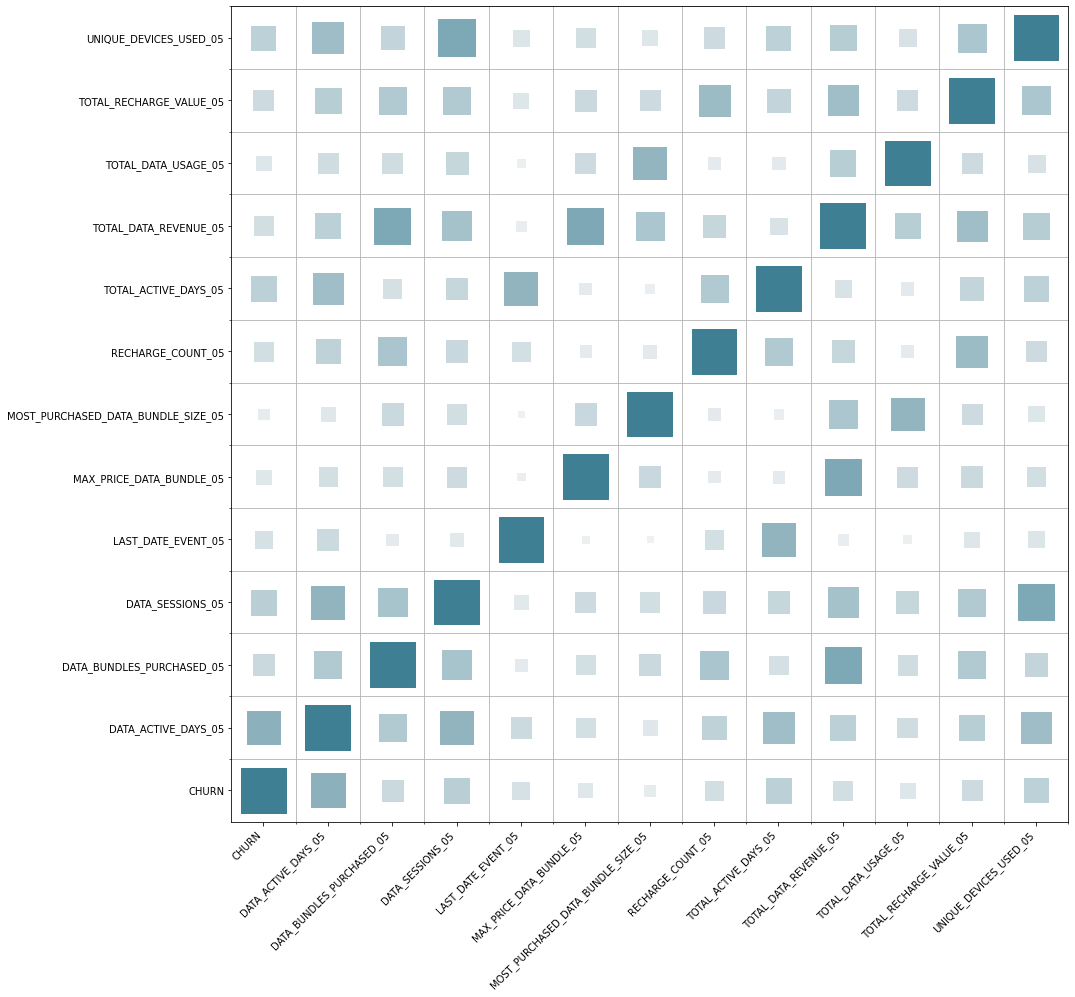

In [8]:
generate_correlation_matrix(churn_df_05, fig_size = 15, size_scale = 2000)

### <a id='4'>4. Model Creation</a>

The required libraries for the modelling phase are imported.

In [9]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import \
    accuracy_score, \
    classification_report, \
    confusion_matrix, \
    roc_auc_score, \
    roc_curve, \
    f1_score, \
    precision_score, \
    recall_score, \
    precision_recall_curve, \
    average_precision_score

from yellowbrick.classifier import DiscriminationThreshold

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

`churn_df_05` is split into **train** and **test** datasets (3:1 train-test split)

In [10]:
features_01 = [col for col in churn_df_01.columns if col != 'CHURN']
features_02 = [col for col in churn_df_02.columns if col != 'CHURN']
features_03 = [col for col in churn_df_03.columns if col != 'CHURN']
features_04 = [col for col in churn_df_04.columns if col != 'CHURN']
features_05 = [col for col in churn_df_05.columns if col != 'CHURN']

def get_train_test_split(churn_df, features):

    X_train, X_test, y_train, y_test = train_test_split(
        churn_df[features], 
        churn_df['CHURN'],
        test_size = 0.25, 
        random_state = 111
    )

    y_test = np.array(y_test).reshape(-1, 1)

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_split(churn_df_05, features_05)


A dictionary is created to store all models.

*Default model parameters are selected with some models tuned after iterations and manual inspection.*

In [11]:
def create_model_dictionary(features):

    # Logistic Regression
    logistic_reg = LogisticRegression(
        C = 1,
        class_weight = None,
        dual = False,
        fit_intercept = True,
        intercept_scaling = 1,
        max_iter = 100,
        multi_class = 'ovr',
        n_jobs = 1,
        penalty = 'l1',
        random_state = 123,
        solver = 'liblinear',
        tol = 0.0001,
        verbose = 0,
        warm_start = False
    )

    # Decision Tree Classifier
    decision_tree = DecisionTreeClassifier(
        max_depth = 9, 
        random_state = 123,
        splitter = "best", 
        criterion = "gini"
    )

    # KNN Classifier
    knn = KNeighborsClassifier(
        algorithm = 'auto', 
        leaf_size = 30, 
        metric = 'minkowski',
        metric_params = None, 
        n_jobs = 1, 
        n_neighbors = 5, 
        p = 2,
        weights = 'uniform'
    )

    # Random Forest Classifier
    random_forest = RandomForestClassifier(
        n_estimators = 100, 
        random_state = 123,
        max_depth = 9, 
        criterion = "gini"
    )

    # Light Gradient Boost Classifier
    light_gbm = LGBMClassifier(
        boosting_type = 'gbdt', 
        class_weight = None, 
        colsample_bytree = 1.0,
        learning_rate = 0.5, 
        max_depth = 7, 
        min_child_samples = 20,
        min_child_weight = 0.001,
        min_split_gain = 0.0, 
        n_estimators=100,
        n_jobs = -1, 
        num_leaves = 500, 
        objective = 'binary', 
        random_state = None,
        reg_alpha = 0.0, 
        reg_lambda = 0.0, 
        silent = True, 
        subsample = 1.0,
        subsample_for_bin = 200000, 
        subsample_freq = 0
    )

    models_dict = {
        'Logistic Regression': logistic_reg,
        'Decision Tree': decision_tree, 
        'KNN Classifier': knn, 
        'Random Forest Classifier': random_forest,
        'LGB Classifier': light_gbm,
    }

    return models_dict

models_dict = create_model_dictionary(features_05)

### <a id='5'>5. Model Evaluation</a>

Create a Data Frame that stores all model results.

In [12]:
def model_evaluation(model, model_name, X_train, X_test, y_train, y_test):

    model = model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    f1score = f1_score(y_test, predictions) 
    roc_auc = roc_auc_score(y_test, predictions)

    model_results_df = pd.DataFrame(
        data = {
            'Model' : [model_name],
            'Accuracy' : [accuracy],
            'Recall' : [recall],
            'Precision' : [precision],
            'f1-score' : [f1score],
            'ROC-AUC' : [roc_auc],
        }
    )

    return model_results_df

def create_model_results_df(models_dict, features):

    model_results_dfs = [] 

    for model_name in models_dict:
        model_results_dfs.append(
            model_evaluation(
                models_dict[model_name],
                model_name, 
                X_train, 
                X_test, 
                y_train, 
                y_test
            )
        )

    model_results_df = pd.concat(model_results_dfs).set_index('Model')
    
    return model_results_df

X_train, X_test, y_train, y_test = get_train_test_split(churn_df_05, features_05)

model_results = create_model_results_df(models_dict, features_05)
model_results.to_csv('data/model_results.csv', index = False)
model_results

,Accuracy,Recall,Precision,f1-score,ROC-AUC
Model,,,,,
Logistic Regression,0.758971,0.757523,0.658352,0.704465,0.758689
Decision Tree,0.760488,0.802226,0.649029,0.717542,0.768609
KNN Classifier,0.720185,0.635067,0.630026,0.632536,0.703624
Random Forest Classifier,0.767018,0.785702,0.662608,0.718924,0.770654
LGB Classifier,0.756332,0.785180,0.647354,0.709637,0.761945


### <a id='6'>6. Model Selection</a>

A series of confusion matrices, ROC plots, and Discrimination plots are generated to assist in the model selection process.

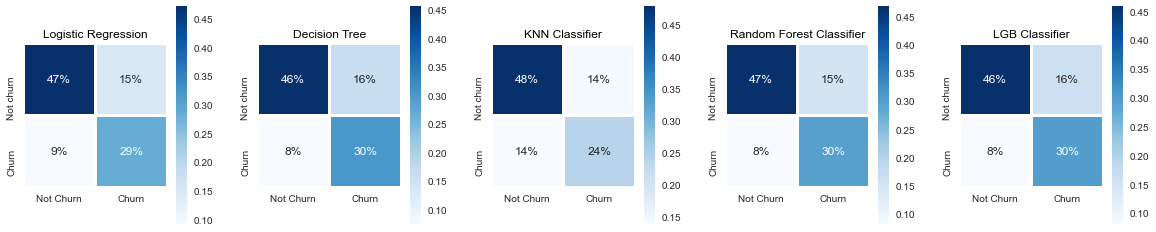

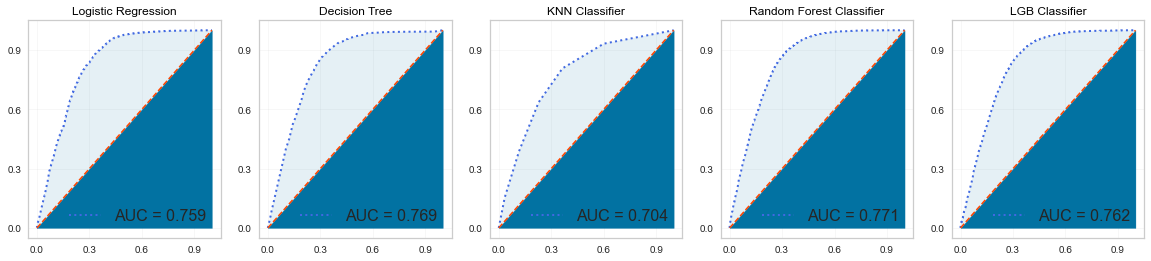

In [13]:
def confusion_matrix_plots(models_dict, X_train, X_test, y_train, y_test, fig_col_number):

    fig = plt.figure(
        figsize = (
            4 * fig_col_number, 
            4 * ceil(len(models_dict)/fig_col_number)
        )
    )
    
    for model_name, fig_pos in itertools.zip_longest(models_dict, range(len(models_dict))):
        
        plt.subplot(
            ceil(len(models_dict)/fig_col_number), 
            fig_col_number, 
            fig_pos + 1
        )
        
        model = models_dict[model_name].fit(X_train, y_train)
        predictions = model.predict(X_test)
        conf_matrix = confusion_matrix(y_test, predictions)
        
        sns.heatmap(
            conf_matrix/np.sum(conf_matrix), 
            annot = True, 
            fmt = '.0%', 
            square = True,
            xticklabels = ['Not Churn', 'Churn'],
            yticklabels = ['Not churn', 'Churn'],
            linewidths = 2, 
            linecolor = 'w', 
            cmap = 'Blues'
        )
        
        plt.title(model_name, color = 'black')
        plt.subplots_adjust(wspace = .3, hspace = .3)

def roc_plot(models_dict, X_train, X_test, y_train, y_test, fig_col_number):

    fig = plt.figure(
        figsize = (
            4 * fig_col_number, 
            4 * ceil(len(models_dict)/fig_col_number)
        )
    )

    for model_name, fig_pos in itertools.zip_longest(models_dict, range(len(models_dict))):
        
        qx = plt.subplot(
            ceil(len(models_dict)/fig_col_number), 
            fig_col_number, 
            fig_pos + 1
        )

        model = models_dict[model_name].fit(X_train, y_train)
        predictions = model.predict(X_test)
        probabilities = model.predict_proba(X_test)

        fpr, tpr, thresholds = roc_curve(y_test, probabilities[:,1])

        plt.plot(
            fpr, 
            tpr, 
            linestyle = 'dotted',
            color = 'royalblue', 
            linewidth = 2,
            label = 'AUC = ' + str(np.around(roc_auc_score(y_test, predictions), 3))
        )
        plt.plot(
            [0,1],
            [0,1], 
            linestyle = 'dashed',
            color = 'orangered', 
            linewidth = 1.5
        )
        plt.fill_between(
            fpr, 
            tpr,
            alpha = 0.1
        )
        plt.fill_between(
            [0, 1], 
            [0, 1], 
            color = 'b'
        )
        plt.legend(
            loc = 'lower right',
            prop = {'size' : 16},
        )
        qx.set_facecolor('w')
        plt.grid(
            True, 
            alpha = 0.15
        )
        plt.title(
            model_name, 
            color = 'black'
        )
        plt.xticks(
            np.arange(0, 1, .3)
        )
        plt.yticks(
            np.arange(0, 1, .3)
        )

def discrimination_plots(models_dict, X_train, X_test, y_train, y_test):

    for model_name in models_dict:

        visualizer = DiscriminationThreshold(
            estimator = models_dict[model_name],
            ax = None,
            n_trials = 10,
            cv = 0.1,
            fbeta = 1.0,
            argmax = 'fscore',
            exclude = None,
            quantiles = np.array([0.1, 0.5, 0.9]),
            random_state = None, 
            is_fitted = 'auto',
            force_model = False
        )
        visualizer.fit(X_train, y_train)
        visualizer.show()

confusion_matrix_plots(models_dict, X_train, X_test, y_train, y_test, 5)
roc_plot(models_dict, X_train, X_test, y_train, y_test, 5)

The model results and visualizations suggest that the **Random Forest Classifier** is the optimal model choice for this application with an `f1_score` of 0.719 and an `AUC` of 0.771.

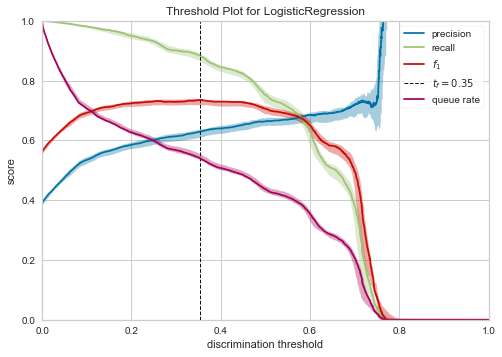

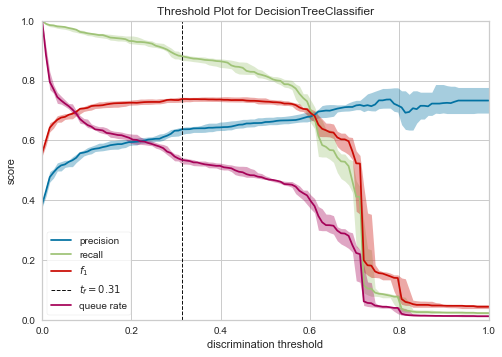

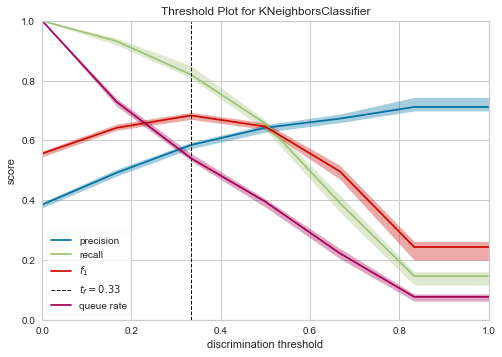

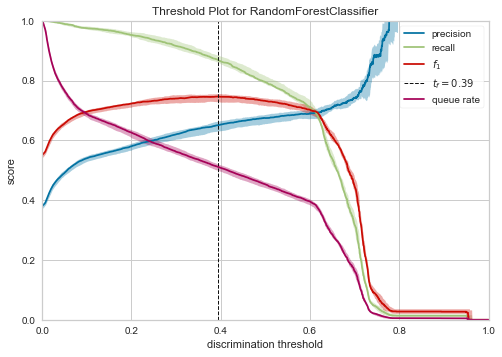

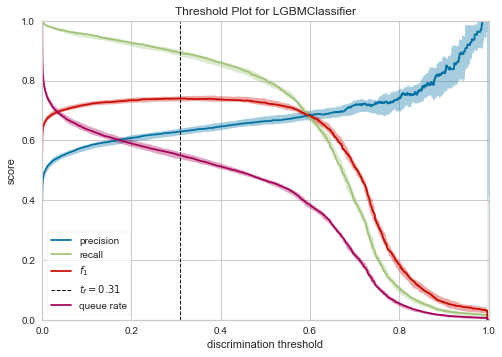

In [14]:
discrimination_plots(models_dict, X_train, X_test, y_train, y_test)

### <a id='7'>7. Conclusion</a>

All evaluated models, except for the KNN Classifier, performed reasonably well in the classification task to predict whether a subscriber will churn. However, the **Random Forest Classifier** slightly outperformed all the evaluated models and is therefore the preffered model for selection with an `f1_score` of 0.719 and an `AUC` of 0.771. 

The model score can be improved further by exploring other types of categorical data associated with the subscribers. The dataset availale only contained numerical data related to data usage activity, but the inclusion of demographics and other independent variables could add more value to these classification models. Not all features were included in the model for various logical reasons, but further analyses should consider optimising the model parameters and iterating through various feature inclusions and selections.

The analysis conducted only used Week 5 as the most recent week to predict if a subsriber will churn. The inclusion (or aggregation) of the previous 4 weeks data in the input window can perhaps aid in improving the model's accuracy.

### <a id='8'>8. Recommendations</a>

Ultimately, Yellow Mobile's goal is to reduce data churn. The model evaluation suggests that there are opportunities to discover segments of subscribers that are more likely to churn than others.

Some recommendations to reduce data churn using targetted campaigns include the following:

- Prepare personalisations for Yellow Mobile's website and mobile app that apply to subscribers that are predicted to churn so that they have a more tailored user experience that will encourage them to recharge their data or continue using it. Once the personalisations are configured for these subscribers, direct marketing campaigns via email and WhatsApp can be used to prompt these subscribers to navigate to Yellow Mobile's digital platforms so that they can be imersed in their personalised experiences.

- Perform further analytics on the subscribers that are likely to churn to understand what their data usage patterns are like and then create tailored specials and promotions for them that can be pushed via the direct marketing channels so that the subscriber is more likely to avoid churning. Using time-series data and perhaps even a forecasting model can greatly assist with the discovery of further insights to help decrease data churn. Knowing when subscribers are likely to churn is critical and can be used to inform direct marketing channels to automate communications to the subscribers at the times that they are most likely to convert by purchasing a bundle or using their data.
